# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

   https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [28]:
url = 'https://drive.google.com/uc?id=1Xu5BsSPhs5MfDbEpX47uOQvit0RcKaZJ'

df = pd.read_csv(url)

In [29]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [30]:
df.tail()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02
9999,TXN_6170729,Sandwich,3,4.0,12.0,Cash,In-store,2023-11-07


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [32]:
# Semua fitur kecuali transaction id itu ada error dan unknown, harus diubah terlebih dahulu ke nan
feature_names = ['Item', 'Quantity', 'Payment Method', 'Price Per Unit' ,'Total Spent', 'Location', 'Transaction Date']

# akan mereplace semua incorect values dengan nan
for feature in feature_names:
  df[feature] = df[feature].replace('ERROR', np.nan)
  df[feature] = df[feature].replace('UNKNOWN', np.nan)

for feature in feature_names:
  print(df[feature].unique())

['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' nan 'Sandwich' 'Juice' 'Tea']
['2' '4' '5' '3' '1' nan]
['Credit Card' 'Cash' nan 'Digital Wallet']
['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan]
['4.0' '12.0' nan '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' '2.0' '1.0' '7.5' '4.5' '1.5']
['Takeaway' 'In-store' nan]
['2023-09-08' '2023-05-16' '2023-07-19' '2023-04-27' '2023-06-11'
 '2023-03-31' '2023-10-06' '2023-10-28' '2023-07-28' '2023-12-31'
 '2023-11-07' nan '2023-05-03' '2023-06-01' '2023-03-21' '2023-11-15'
 '2023-06-10' '2023-02-24' '2023-03-25' '2023-01-15' '2023-04-04'
 '2023-03-30' '2023-12-01' '2023-09-18' '2023-06-03' '2023-12-13'
 '2023-04-20' '2023-04-10' '2023-03-11' '2023-06-02' '2023-11-06'
 '2023-08-15' '2023-10-09' '2023-05-28' '2023-07-17' '2023-04-29'
 '2023-06-08' '2023-06-29' '2023-04-17' '2023-12-22' '2023-01-10'
 '2023-10-02' '2023-02-23' '2023-03-22' '2023-11-03' '2023-03-02'
 '2023-06-26' '2023-05-02' '2023-09-05' '2023-01-08' '2023-03-15'
 '2023

In [33]:
df.isna().sum()

,0
Transaction ID,0
Item,969
Quantity,479
Price Per Unit,533
Total Spent,502
Payment Method,3178
Location,3961
Transaction Date,460


In [34]:
# konversi tipe data
numeric_features = ['Quantity', 'Price Per Unit', 'Total Spent']

df[numeric_features] = df[numeric_features].astype(float)


In [35]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

In [36]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,NaN,NaN,2023-08-30
9996,TXN_9659401,NaN,3.0,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3.0,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9031 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [38]:
df.describe(include="all")

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9031,9521.000000,9467.000000,9498.000000,6822,6039,9540
unique,10000,8,NaN,NaN,NaN,3,2,NaN
top,TXN_9226047,Juice,NaN,NaN,NaN,Digital Wallet,Takeaway,NaN
freq,1,1171,NaN,NaN,NaN,2291,3022,NaN
mean,NaN,NaN,3.028463,2.949984,8.924352,NaN,NaN,2023-07-01 23:00:31.698113280
min,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,2023-01-01 00:00:00
25%,NaN,NaN,2.000000,2.000000,4.000000,NaN,NaN,2023-04-01 00:00:00
50%,NaN,NaN,3.000000,3.000000,8.000000,NaN,NaN,2023-07-02 00:00:00
75%,NaN,NaN,4.000000,4.000000,12.000000,NaN,NaN,2023-10-02 00:00:00
max,NaN,NaN,5.000000,5.000000,25.000000,NaN,NaN,2023-12-31 00:00:00


In [39]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Transaction ID', 'Item', 'Payment Method', 'Location'], dtype='object')
Numerical Variables:
['Quantity', 'Price Per Unit', 'Total Spent']


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

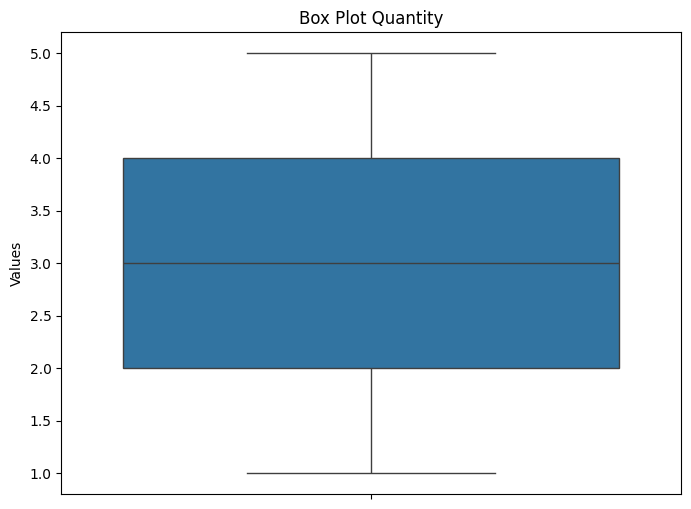

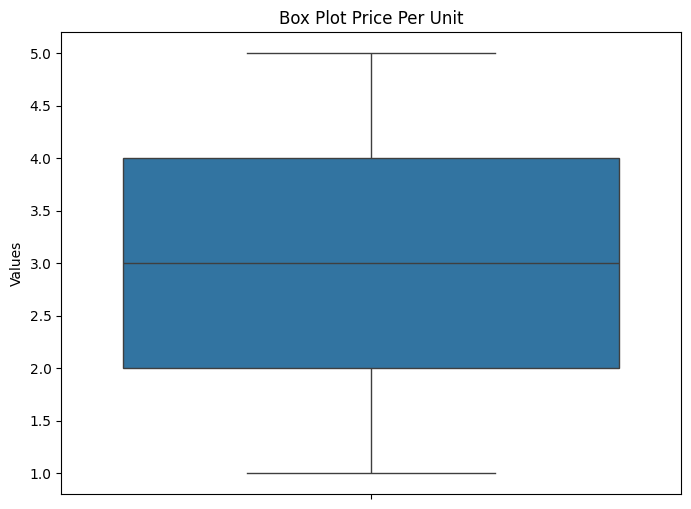

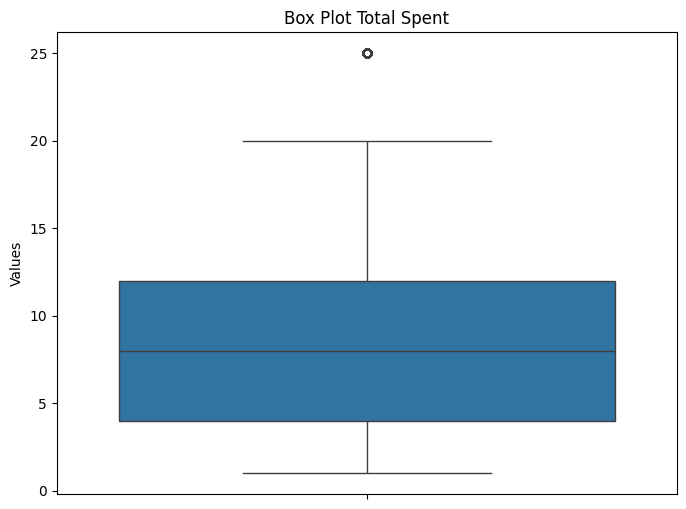

In [40]:
for numeric in num_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df, y=numeric)
  plt.ylabel('Values')
  plt.title(f'Box Plot {numeric}')
  plt.show()

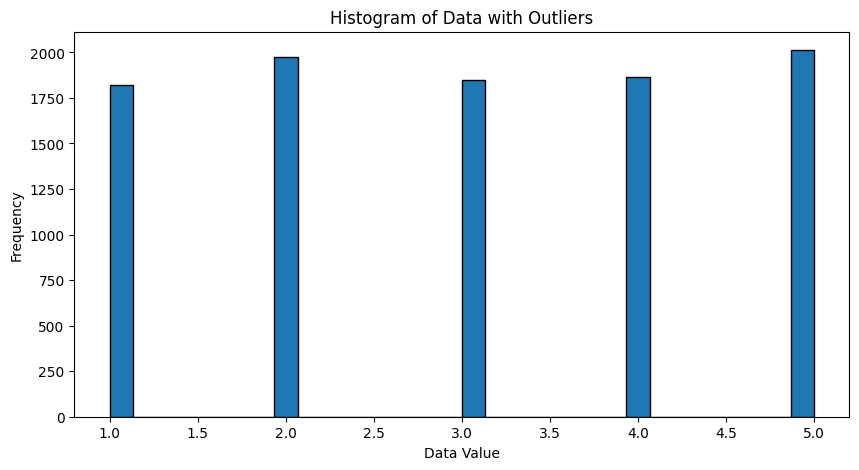

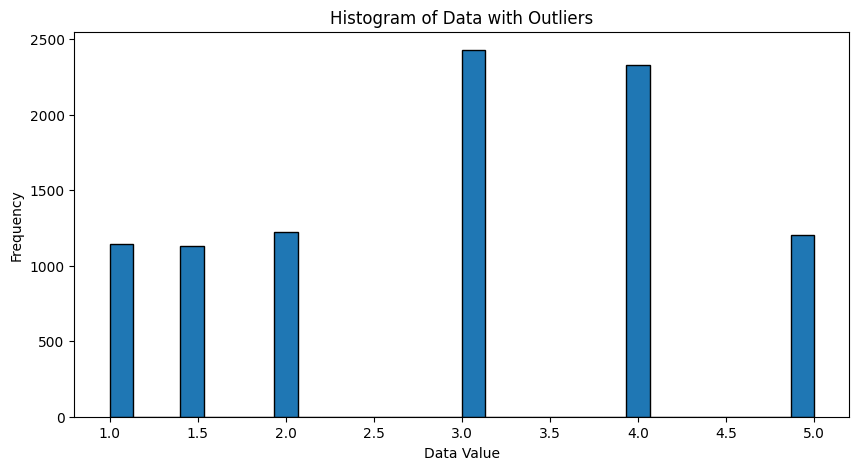

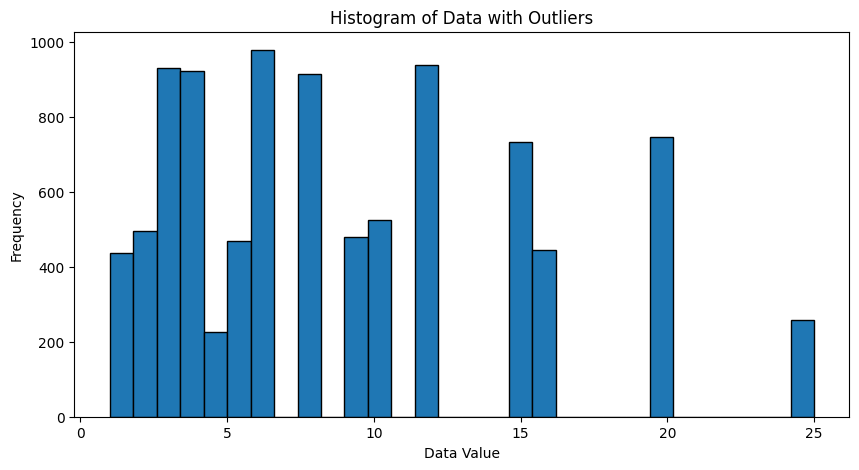

In [41]:
for numeric in num_cols:
  plt.figure(figsize=(10, 5))
  plt.hist(df[numeric], bins=30, edgecolor='black')
  plt.title("Histogram of Data with Outliers")
  plt.xlabel("Data Value")
  plt.ylabel("Frequency")
  plt.show()

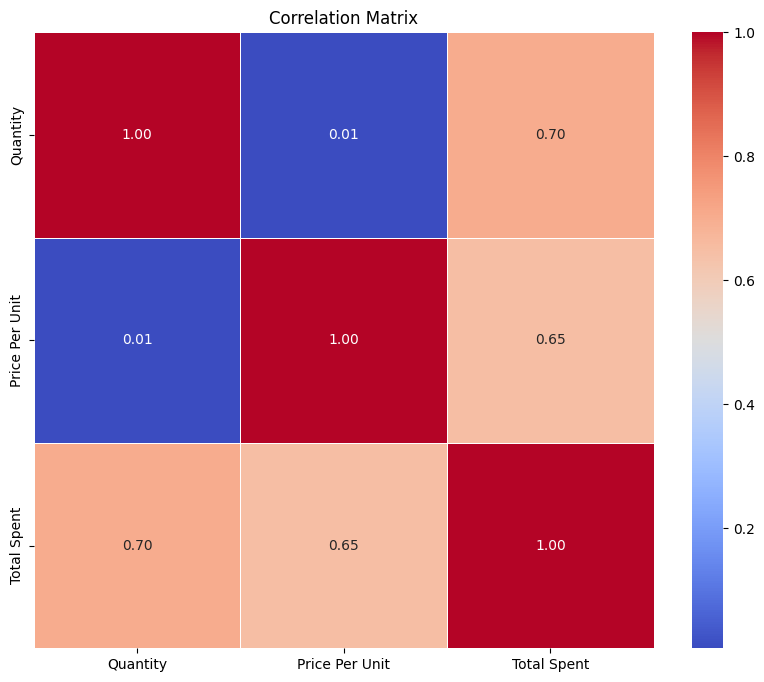

In [42]:
# Assuming 'df' is your DataFrame
correlation_matrix = df[num_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [43]:
# feature selection
# Item, Quantity, Price Per Unit, Total Spent, Transaction Date
num_cols = ['Quantity', 'Price Per Unit', 'Total Spent']
cat_cols = ['Item', 'Transaction Date']   # atau tambahkan yang perlu

df_selection = df[['Item', 'Quantity', 'Price Per Unit', 'Total Spent', 'Transaction Date']].copy()


In [44]:
# menangani nilai yang kosong dan menggantinya dengan median
df_selection[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [45]:
# hapus nilai yang kosong
df_selection = df_selection.dropna()

In [46]:
df_selection.isna().sum()

,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Transaction Date,0


In [47]:
df_selection.shape

(8613, 5)

In [48]:
# Menghapus data duplikat
df_selection = df_selection.drop_duplicates()

In [49]:
# Standar Scaler
scaler = StandardScaler()
standard_df = pd.DataFrame(scaler.fit_transform(df_selection[num_cols]), columns=num_cols)

In [50]:
# Handling Outliers
for numeric in num_cols:
  Q1 = df_selection[num_cols].quantile(0.25)
  Q3 = df_selection[num_cols].quantile(0.75)
  IQR = Q3 - Q1

  df_clean = df_selection[
      ~(
          (df_selection[num_cols] < (Q1 - 1.5 * IQR)) |
          (df_selection[num_cols] > (Q3 + 1.5 * IQR))
      ).any(axis=1)
  ]


In [51]:
df_clean.loc[:, 'TotalSpent_Bin'] = pd.qcut(
    df_clean['Total Spent'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

/tmp/ipython-input-3635661650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'TotalSpent_Bin'] = pd.qcut(


In [52]:
output_path = "clean_dataset.csv"
df_clean.to_csv(output_path, index=False)

print(f"Dataset hasil preprocessing berhasil disimpan ke: {output_path}")

Dataset hasil preprocessing berhasil disimpan ke: clean_dataset.csv
